In [2]:
import copy
import re
import utils

from itertools import chain

utils.get_input(20)

In [70]:
data = [d.strip().split("\n") for d in utils.get_local_input("inputs_20.txt", False).strip().split("\n\n")]
test = [d.strip().split("\n") for d in utils.get_local_input("test_20.txt", False).strip().split("\n\n")]

In [91]:
def set_tile(tile: list):
    """Make a set out of the tile's 8 possible borders
    
    That means the 4 main ones plus each one flipped
    """
    name = int(re.findall("\d+", tile[0])[0])
    borders = {
        "".join([row[0] for row in tile[1:]]),
        "".join([row[-1] for row in tile[1:]]),
        tile[1],
        tile[-1],
    }
    flipped = {b[::-1] for b in borders}
    borders = borders | flipped

    return name, borders

tiles = {set_tile(tile)[0]: set_tile(tile)[1] for tile in data}
test_tiles = {set_tile(tile)[0]: set_tile(tile)[1] for tile in test}

In [98]:
import networkx as nx

# Make a graph where each node is a tile id
# Add an edge where two tiles have matching items
# in their set of possible borders
use = tiles

G = nx.Graph()
G.add_nodes_from(use.keys())

size = len(use)
as_list = list(use.items())
for i in range(size):
    for j in range(i+1, size):
        if as_list[i][1].intersection(as_list[j][1]):
            G.add_edge(as_list[i][0], as_list[j][0])

In [99]:
# If you only have 2 neighbours you're a corner
from math import prod

prod([node for node, val in G.degree() if val == 2])

68781323018729

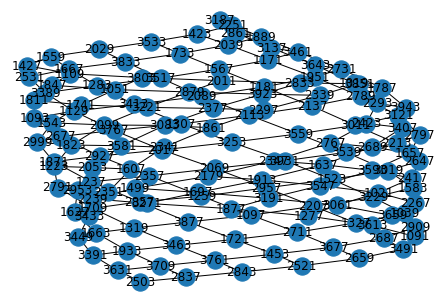

In [100]:
nx.draw(G, with_labels=True)